# Classification on CIFAR 10 Dataset

Instructions - 
1. In order to kick start, code for setting up the dataframes has already been given (Step 1 to 5)
2. Go through the entire code written below and put the relavent comment for each line of code. Understanding below mentioned code is very important.
3. After commenting the code in step 1 to 5, complete step 6 and 7

### Step - 1 (Setup Code)

In [19]:
# Run some setup code for this notebook.
import random
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report

from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from sklearn.model_selection import GridSearchCV


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Step - 2 (Download the dataset)

In [20]:
# # Use this code to download the dataset for the first time
# # You will be required to install wget using pip
# # For Linux users checkout the alternative for 'del'
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
# !del cifar-10-python.tar.gz


--2021-11-28 13:44:33--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: 'cifar-10-python.tar.gz'

     0K .......... .......... .......... .......... ..........  0% 85.3K 32m31s
    50K .......... .......... .......... .......... ..........  0%  188K 23m38s
   100K .......... .......... .......... .......... ..........  0% 7.86M 15m52s
   150K .......... .......... .......... .......... ..........  0% 10.4M 11m58s
   200K .......... .......... .......... .......... ..........  0%  192K 12m27s
   250K .......... .......... .......... .......... ..........  0% 4.24M 10m29s
   300K .......... .......... .......... .......... ..........  0% 16.9M 9m0s
   350K .......... .......... .......... .......... ..........  0% 9.04M 7m55s
  

 49650K .......... .......... .......... .......... .......... 29% 2.63M 5m3s
 49700K .......... .......... .......... .......... .......... 29% 12.9M 5m2s
 49750K .......... .......... .......... .......... .......... 29% 14.2M 5m2s
 49800K .......... .......... .......... .......... .......... 29% 11.7M 5m2s
 49850K .......... .......... .......... .......... .......... 29% 7.38M 5m1s
 49900K .......... .......... .......... .......... .......... 29% 11.7M 5m1s
 49950K .......... .......... .......... .......... .......... 30% 6.90M 5m0s
 50000K .......... .......... .......... .......... .......... 30% 12.9M 5m0s
 50050K .......... .......... .......... .......... .......... 30% 6.80M 5m0s
 50100K .......... .......... .......... .......... .......... 30% 12.2M 4m59s
 50150K .......... .......... .......... .......... .......... 30% 20.2M 4m59s
 50200K .......... .......... .......... .......... .......... 30% 4.63M 4m58s
 50250K .......... .......... .......... .......... .........

149600K .......... .......... .......... .......... .......... 89% 5.85M 16s
149650K .......... .......... .......... .......... .......... 89% 11.0M 16s
149700K .......... .......... .......... .......... .......... 89% 11.3M 16s
149750K .......... .......... .......... .......... .......... 89% 8.73M 16s
149800K .......... .......... .......... .......... .......... 89% 4.15M 16s
149850K .......... .......... .......... .......... .......... 90% 15.3M 16s
149900K .......... .......... .......... .......... .......... 90% 7.34M 16s
149950K .......... .......... .......... .......... .......... 90% 5.27M 16s
150000K .......... .......... .......... .......... .......... 90% 7.74M 16s
150050K .......... .......... .......... .......... .......... 90% 5.77M 16s
150100K .......... .......... .......... .......... .......... 90% 13.6M 16s
150150K .......... .......... .......... .......... .......... 90% 10.1M 16s
150200K .......... .......... .......... .......... .......... 90% 3.27M 16s

x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1


In [2]:
conda install -c menpo wget

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Sikha\anaconda3

  added / updated specs:
    - wget


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2020.07  |           py38_0           6 KB
    anaconda-custom            |           py38_1          36 KB
    gmpy2-2.0.8                |   py38h7edee0f_3         145 KB
    libllvm9-9.0.1             |       h21ff451_0          61 KB
    mpc-1.1.0                  |       h7edee0f_1         260 KB
    mpfr-4.0.2                 |       h62dcd97_1         1.5 MB
    mpir-3.0.0                 |       hec2e145_1         1.3 MB
    pathtools-0.1.2            


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.05=py38_0
  - defaults/win-64::anaconda-client==1.7.2=py38_0
  - defaults/win-64::anaconda-navigator==2.1.1=py38_0
  - defaults/noarch::anaconda-project==0.9.1=pyhd3eb1b0_1
  - defaults/noarch::conda-repo-cli==1.0.4=pyhd3eb1b0_0
  - defaults/noarch::flake8==3.9.0=pyhd3eb1b0_0
  - defaults/noarch::importlib_metadata==3.10.0=hd3eb1b0_0
  - defaults/noarch::ipywidgets==7.6.3=pyhd3eb1b0_1
  - defaults/noarch::jsonschema==3.2.0=py_2
  - defaults/win-64::jupyter==1.0.0=py38_7
  - defaults/noarch::jupyterlab==3.0.14=pyhd3eb1b0_1
  - defaults/noarch::jupyterlab_server==2.4.0=pyhd3eb1b0_0
  - defaults/win-64::jupyter_server==1.4.1=py38haa95532_0
  - defaults/noarch::nbclassic==0.2.6=pyhd3eb1b0_0
  - defaults/noarch::nbclient==0.5.3=pyhd3eb1b0_0
  - defaults/win-64::nbconvert==6.0.7=py38_0
  - defaults/noarch::nbformat==5.1.3=pyhd3eb

### Step - 3 (Load the Dataset)

In [21]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


### Step - 4 (Visualization)

Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

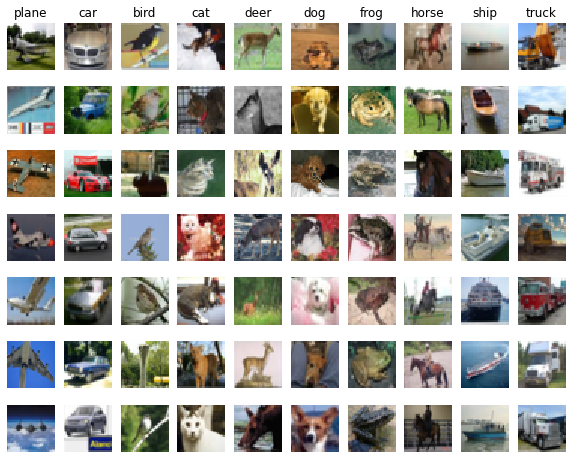

In [22]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### Step - 5 (Flattening the images)

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [23]:
# Subsample the data for more efficient code execution in this exercise

num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


### Step - 6 (Apply all possible classification algorithms)

For each algo complete the following steps with appropriate plots, diagrams and code - 
1. Discuss the intuition behind each algorithm
2. Mention pros and cons
3. Discuss about Model parameters and Hyperparameters
4. Discuss about overfitting and underfitting with relavant plots and code (Hint: Use cross validation and plot hyperparameter vs accuracy score)
5. Discuss about train and test time/space complexities
6. Measure the performance of model using various metrics and write in detail about each metric

In [24]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]
model_train_time=[]

In [25]:
def train_and_score (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  #storing the start time of model training
  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  #storing the time when the model ended trining 
  stop = time.time()
  #calculating the total time taken for model training 
  time_min=round((stop - start)/60,4)
  # printing the time taken to train the model
  print(f"Training time: {time_min}min")
  model_train_time.append(time_min)
  
  

  # finding the best parameters of the model if any 
  if best_parameter==True:
    # using try except method to avoid any error
    try:
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass
  # finding best score of the model 
  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass
#predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  def score (actual,predicted,append=True):
    '''
    calcuating diffrent score matrix of the model
    '''
    # calculating f1_score score
    f1 = f1_score(actual,predicted,average='micro')

    
    # printing all the scores
    print("\tThe f1 is ", f1)

    # uploading all the score of the matrix in in the list 
    if append==True:
      model_f1_score.append(f1)
    else:
      pass
# printing the score by the help of coustom score function
  # for train set
  print('\t\t\t\tscore matrix for train')
  print('*'*80)
  score(y_train,y_pred_train,False)
  print('\n')
  # for test set
  print('\t\t\t\tscore matrix for test')
  print('*'*80)
  score(y_test,y_pred_test)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# knn

In [27]:
from sklearn.neighbors import KNeighborsClassifier
k = int(input("Enter the value of k for k-Nearest Neighbor Classifier: "))
knn = KNeighborsClassifier(n_neighbors=k)   

tic = time.time()
knn.fit(X_train, y_train)
toc = time.time()
duration=toc-tic
print('Training duration is: ',duration)

start=time.time()
y_val_predict= knn.predict(X_val)
completed=time.time()
duration2=completed-start
print('Validation duration is:',duration2)

print("K- Neighbors Prediction")
print(classification_report(y_val, y_val_predict))

Enter the value of k for k-Nearest Neighbor Classifier: 5
Training duration is:  0.023935556411743164
Validation duration is: 0.4015388488769531
K- Neighbors Prediction
              precision    recall  f1-score   support

           0       0.41      0.69      0.52       101
           1       0.88      0.35      0.50       107
           2       0.30      0.62      0.41        96
           3       0.49      0.36      0.42        92
           4       0.28      0.66      0.40        95
           5       0.57      0.19      0.29        88
           6       0.50      0.34      0.40       113
           7       0.67      0.22      0.33        99
           8       0.51      0.67      0.58       105
           9       0.92      0.21      0.34       104

    accuracy                           0.43      1000
   macro avg       0.55      0.43      0.42      1000
weighted avg       0.56      0.43      0.42      1000



In [29]:
# Testing the model with test dataset
st=time.time()
y_test_predict= knn.predict(X_test)
com=time.time()
print('Testing Duration is: ', com-st)
print(classification_report(y_test,y_test_predict))

Testing Duration is:  0.25077152252197266
              precision    recall  f1-score   support

           0       0.29      0.49      0.36        57
           1       0.56      0.12      0.20        41
           2       0.24      0.57      0.34        51
           3       0.26      0.12      0.17        49
           4       0.13      0.35      0.19        40
           5       0.29      0.10      0.15        48
           6       0.41      0.22      0.29        54
           7       0.50      0.04      0.08        47
           8       0.38      0.58      0.46        57
           9       0.62      0.09      0.16        56

    accuracy                           0.28       500
   macro avg       0.37      0.27      0.24       500
weighted avg       0.37      0.28      0.25       500



In [30]:
# Accuracy of the K-Neighbors Algorithm
from sklearn.metrics import accuracy_score
print( "The accuracy of the knn model is: ",accuracy_score(y_test,y_test_predict))

The accuracy of the knn model is:  0.278


# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
train_and_score(DecisionTree,X_test, X_train, y_test, y_train)

Training time: 0.2189min
				score matrix for train
********************************************************************************
	The f1 is  0.3346


				score matrix for test
********************************************************************************
	The f1 is  0.264


# Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# creating Random Forest Regressor model
rfc=RandomForestClassifier(n_jobs=-1,verbose=0)

In [34]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc,X_test, X_train, y_test, y_train,best_parameter=True)

Training time: 0.0507min
				score matrix for train
********************************************************************************
	The f1 is  1.0


				score matrix for test
********************************************************************************
	The f1 is  0.35


# SVM

In [35]:
from sklearn.svm import SVC
import time

clf = SVC()  

tic = time.time()
clf.fit(X_train, y_train)
toc = time.time()
duration=toc-tic
print('Training duration is: ',duration)

start=time.time()
y_val_predict= clf.predict(X_val)
completed=time.time()
duration2=completed-start
print('Validation duration is:',duration2)

print("SVC Prediction")
print(classification_report(y_val, y_val_predict))

Training duration is:  46.994778633117676
Validation duration is: 10.370225191116333
SVC Prediction
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       101
           1       0.83      0.81      0.82       107
           2       0.56      0.72      0.63        96
           3       0.70      0.61      0.65        92
           4       0.63      0.62      0.63        95
           5       0.81      0.67      0.73        88
           6       0.63      0.65      0.64       113
           7       0.82      0.75      0.78        99
           8       0.73      0.84      0.78       105
           9       0.77      0.79      0.78       104

    accuracy                           0.72      1000
   macro avg       0.72      0.71      0.72      1000
weighted avg       0.72      0.72      0.72      1000



In [37]:
## Testing the model with test dataset
st=time.time()
y_test_predicted= clf.predict(X_test)
com=time.time()
print('Testing Duration is: ', com-st)
print(classification_report(y_test,y_test_predicted))

Testing Duration is:  5.454676628112793
              precision    recall  f1-score   support

           0       0.43      0.42      0.42        57
           1       0.49      0.51      0.50        41
           2       0.38      0.35      0.36        51
           3       0.33      0.24      0.28        49
           4       0.18      0.20      0.19        40
           5       0.35      0.35      0.35        48
           6       0.41      0.44      0.43        54
           7       0.36      0.30      0.33        47
           8       0.50      0.61      0.55        57
           9       0.51      0.52      0.51        56

    accuracy                           0.40       500
   macro avg       0.39      0.40      0.39       500
weighted avg       0.40      0.40      0.40       500



In [38]:
# Accuracy
from sklearn.metrics import accuracy_score
print( "The accuracy of the svm model is: ",accuracy_score(y_test,y_test_predicted))

The accuracy of the svm model is:  0.404


# Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
import time

naive_bayes_clf=GaussianNB()

tic = time.time()
naive_bayes_clf.fit(X_train, y_train)
toc = time.time()
duration=toc-tic
print('Training duration is: ',duration)

start=time.time()
y_val_pre= naive_bayes_clf.predict(X_val)
completed=time.time()
duration2=completed-start
print('Validation duration is:',duration2)

print("NB Prediction")
print(classification_report(y_val, y_val_pre))

Training duration is:  0.23668265342712402
Validation duration is: 0.26247286796569824
NB Prediction
              precision    recall  f1-score   support

           0       0.28      0.49      0.36       101
           1       0.51      0.23      0.32       107
           2       0.29      0.15      0.19        96
           3       0.20      0.03      0.06        92
           4       0.22      0.42      0.29        95
           5       0.34      0.32      0.33        88
           6       0.28      0.42      0.34       113
           7       0.43      0.13      0.20        99
           8       0.40      0.48      0.44       105
           9       0.38      0.43      0.40       104

    accuracy                           0.32      1000
   macro avg       0.33      0.31      0.29      1000
weighted avg       0.34      0.32      0.30      1000



In [40]:
# Testing the model with the test data
NB_2 = GaussianNB(var_smoothing=0.04328761281083057)
NB_2.fit(X_train,y_train)
st=time.time()
y_test_predict= NB_2.predict(X_test)
com=time.time()
print('Testing Duration is: ', com-st)
print(classification_report(y_test,y_test_predict))

Testing Duration is:  0.1410384178161621
              precision    recall  f1-score   support

           0       0.29      0.40      0.34        57
           1       0.38      0.20      0.26        41
           2       0.15      0.08      0.10        51
           3       0.08      0.02      0.03        49
           4       0.16      0.33      0.21        40
           5       0.32      0.25      0.28        48
           6       0.29      0.44      0.35        54
           7       0.17      0.04      0.07        47
           8       0.36      0.53      0.43        57
           9       0.38      0.41      0.40        56

    accuracy                           0.28       500
   macro avg       0.26      0.27      0.25       500
weighted avg       0.26      0.28      0.25       500



In [41]:
from sklearn.metrics import f1_score
f1_score(y_test_predict, y_test, average='macro')

0.2459879021264389

### Step - 7 (Compare all the models)

Conclude by following below mentioed steps -
1. Plot a table showing all the algorithms used and corresponding performance metrics
2. Is there any one algorithm that can be used on all the datasets? (Hint: Read about 'No Free Lunch' theorem)

In [42]:
#creating dictionary to store all the metrices 
dict={'f1':model_f1_score,'train_time':model_train_time}

In [43]:
# list of all models
model_name=['Desision Tree','Random forest','svm','knn','naive bayes']

In [44]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

ValueError: 5 columns passed, passed data had 2 columns